In [1]:
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [2]:
input_file=Path("2025-06-18_db-levante_keyword.csv")
assert input_file.exists()

In [3]:
df_merged = pd.read_csv(input_file)
df_merged=df_merged.drop(["_id", "analysisRequired", "cloneUrl", "pushDate", "stars"], axis=1)

/tmp/ipykernel_21774/3697925380.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax.set_xticklabels(x_values, rotation=90)


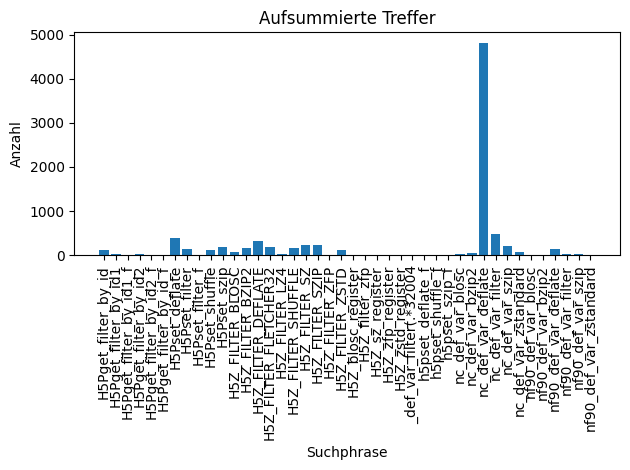

In [4]:
fig, ax = plt.subplots()
ax.set_title("Aufsummierte Treffer")

data=df_merged.sum()
x_values=data.index
y_values=data.values
ax.bar(x_values, y_values)

ax.set_ylabel("Anzahl")
ax.set_xlabel("Suchphrase")
_=ax.set_xticklabels(x_values, rotation=90)

fig.tight_layout()
fig.savefig(f"results/{input_file.stem}_aufsummierte_treffer.svg")

/tmp/ipykernel_21774/3090001786.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _=ax.set_xticklabels(x_values, rotation=90)


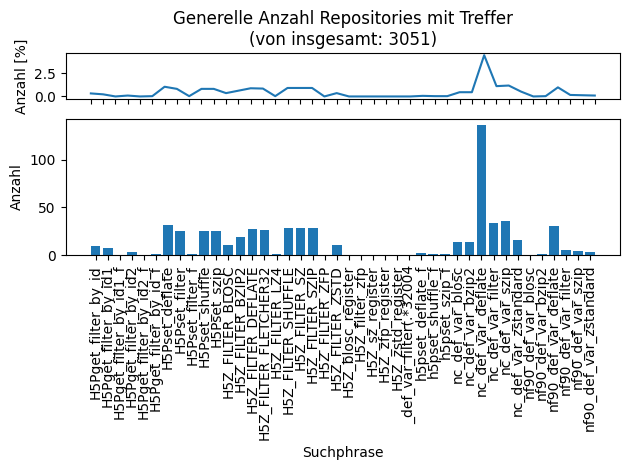

In [5]:
fig, axs = plt.subplots(2,1, height_ratios=[1,3])
ax=axs[1]
ax2=axs[0]

ax2.set_title(f"Generelle Anzahl Repositories mit Treffer\n(von insgesamt: {len(df_merged)})")

data=(df_merged > 0).sum()
percent = data/len(df_merged)*100
x_values=data.index
y_values=data.values
ax.bar(x_values, y_values)
ax2.plot(percent)
ax2.set_xticklabels([])
ax2.set_ylabel("Anzahl [%]")

ax.set_ylabel("Anzahl")
ax.set_xlabel("Suchphrase")
_=ax.set_xticklabels(x_values, rotation=90)

fig.tight_layout()
fig.savefig(f"results/{input_file.stem}_generelle_treffer.svg")

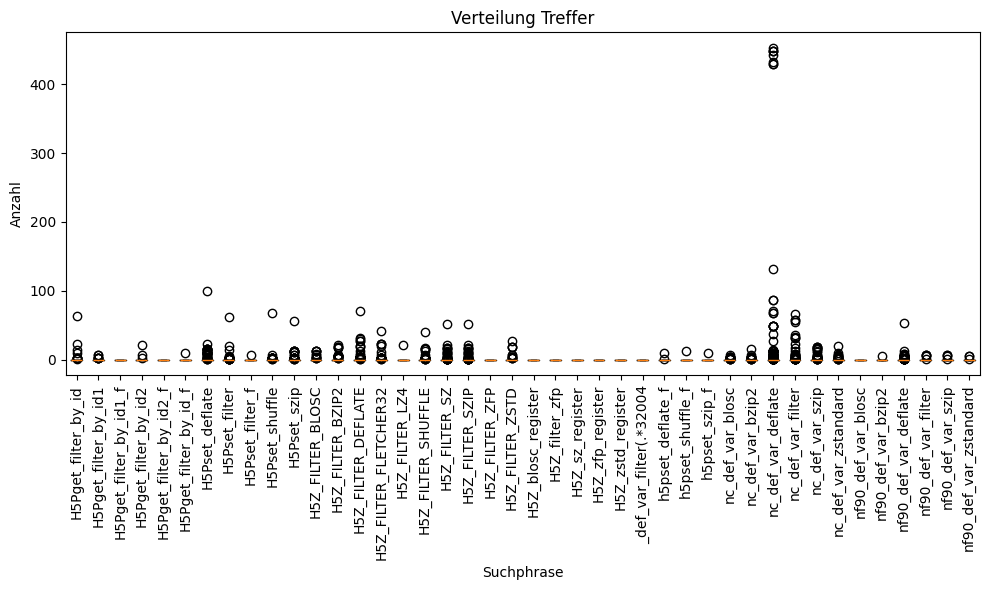

In [6]:
fig, axs = plt.subplots(1,1, figsize=(10,6))
# fig, axs = plt.subplots(1,2, figsize=(20,6))
# ax1=axs[0]
# ax2=axs[1]
ax1=axs
ax1.set_title("Verteilung Treffer")

y_values=df_merged.values
ax1.boxplot(y_values, tick_labels=df_merged.columns)

ax1.set_ylabel("Anzahl")
ax1.set_xlabel("Suchphrase")
_=ax1.set_xticklabels(df_merged.columns, rotation=90)

# limit=300
# ax2.set_title(f"Verteilung Treffer (Limit Y-Achse: {limit})")
# ax2.boxplot(y_values, tick_labels=df_merged.columns)

# ax2.set_ylabel("Anzahl")
# ax2.set_xlabel("Suchphrase")
# _=ax2.set_xticklabels(df_merged.columns, rotation=90)
# ax2.set_ylim(0,limit)

fig.tight_layout()
fig.savefig(f"results/{input_file.stem}_verteilung_treffer.svg")